In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

t=np.array([[None,None,None,None,None]], dtype=np.float)
data=pd.DataFrame()
for distance in range(3,8,1): 
    for velocity in range(4,20,2):
        for angle in range(240,301,1):
            df=pd.read_csv('turbine_%sp00_%sp00_report_%sD.csv' %(angle, velocity, distance) , sep=' ', header=None)
            df=df.tail(1)
            df=pd.melt(df)
            df=df.dropna()
            a=df.to_numpy(dtype=np.float)
            a=a[:,1]
            pri=np.array([[distance, velocity, angle,a[19],a[22]]])
            t=np.concatenate((t,pri), axis=0)
            t=np.delete(t,0,0)
            data=data.append(pd.DataFrame(t))
data=data.rename(columns={0: "Spacing", 1: "Wind Speed", 2: "Wind Direction", 3: "T1 Uref", 4: "T2 Uref"})

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

t=np.array([[None,None,None,None,None, None, None]], dtype=np.float)
data=pd.DataFrame()
for distance in range(3,8,1): 
    for velocity in range(20,21,2):
        for angle in range(240,301,1):
            df=pd.read_csv('turbine_%sp00_%sp00_report_%sD.csv' %(angle, velocity, distance) , sep=' ', header=None)
            df=df.tail(1)
            df=pd.melt(df)
            df=df.dropna()
            a=df.to_numpy(dtype=np.float)
            a=a[:,1]
            x=(np.cos(np.radians(angle-270)))*distance*93
            y=(np.sin(np.radians(angle-270)))*distance*93
            pri=np.array([[distance, velocity, angle,a[19],a[22], x, y]])
            t=np.concatenate((t,pri), axis=0)
            t=np.delete(t,0,0)
            data=data.append(pd.DataFrame(t))
data=data.rename(columns={0: "spacing", 1: "speed", 2: "direction", 3: "t1", 4: "t2", 5: "x", 6:"y"})
data

,spacing,speed,direction,t1,t2,x,y
0,3.0,20.0,240.0,19.273067,19.239824,241.621088,-139.500000
0,3.0,20.0,241.0,19.271507,19.239424,244.018898,-135.261884
0,3.0,20.0,242.0,19.269062,19.238682,246.342378,-130.982566
0,3.0,20.0,243.0,19.255991,19.240416,248.590820,-126.663349
0,3.0,20.0,244.0,19.249039,19.236456,250.763539,-122.305550
...,...,...,...,...,...,...,...
0,7.0,20.0,296.0,19.271261,19.232029,585.114924,285.379617
0,7.0,20.0,297.0,19.275078,19.235327,580.045247,295.547815
0,7.0,20.0,298.0,19.284533,19.235987,574.798883,305.625987
0,7.0,20.0,299.0,19.285231,19.238787,569.377429,315.611063


In [2]:
tp=t1.to_numpy(dtype=np.float)
tp[60]

NameError: name 't1' is not defined

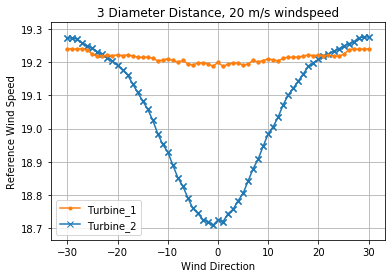

In [35]:
threefour=data[:61]
t1=threefour['t1']
t2=threefour['t2']
fig, ax = plt.subplots()
ax.scatter((threefour['direction']-270),t1, marker='x')
ax.scatter((threefour['direction']-270),t2, marker='.')
turb1,=plt.plot((threefour['direction']-270),t1, marker='x')
turb2,=plt.plot((threefour['direction']-270),t2, marker='.')
plt.ylabel('Reference Wind Speed')
plt.xlabel('Wind Direction')
plt.title('3 Diameter Distance, 20 m/s windspeed')
plt.legend((turb2,turb1),('Turbine_1','Turbine_2'))
#def clear_line(turb1):
#lines.pop(turb1).remove()
plt.grid()    
#plt.plot(diff[0,:],diff[1,:])
plt.show()
#plt.clr()

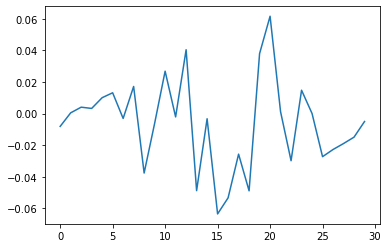

In [45]:
a=np.array([None], dtype=np.float)
for i in range (0,30,1):
    d=np.array([tp[i]-tp[60-i]])
    a=np.concatenate((a,d),axis=0)
a=np.delete(a,0,0)
plt.plot(a)